In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('march.csv')
print(data.head())
print(data)
print('\n Data Types:')
print(data.dtypes)

               date  Met_Mast_Wind_Speed  Actual_Wind_Speed
0  03-01-2019 00:00               1.7518             2.2950
1  03-01-2019 00:10               1.8007             2.1500
2  03-01-2019 00:20               2.2892             1.7000
3  03-01-2019 00:30               3.4139             2.6890
4  03-01-2019 00:40               3.6930             3.0646
                  date  Met_Mast_Wind_Speed  Actual_Wind_Speed
0     03-01-2019 00:00               1.7518             2.2950
1     03-01-2019 00:10               1.8007             2.1500
2     03-01-2019 00:20               2.2892             1.7000
3     03-01-2019 00:30               3.4139             2.6890
4     03-01-2019 00:40               3.6930             3.0646
5     03-01-2019 00:50               6.0398             3.5361
6     03-01-2019 01:00               5.2690             6.2444
7     03-01-2019 01:10               6.0725             5.2823
8     03-01-2019 01:20               6.2293             5.4350
9     03-0

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%y %H:%m')
data = pd.read_csv('march.csv', index_col='date')
print(data.head())

                  Met_Mast_Wind_Speed  Actual_Wind_Speed
date                                                    
03-01-2019 00:00               1.7518             2.2950
03-01-2019 00:10               1.8007             2.1500
03-01-2019 00:20               2.2892             1.7000
03-01-2019 00:30               3.4139             2.6890
03-01-2019 00:40               3.6930             3.0646


In [4]:
data.index

Index(['03-01-2019 00:00', '03-01-2019 00:10', '03-01-2019 00:20',
       '03-01-2019 00:30', '03-01-2019 00:40', '03-01-2019 00:50',
       '03-01-2019 01:00', '03-01-2019 01:10', '03-01-2019 01:20',
       '03-01-2019 01:30',
       ...
       '03-31-2019 22:20', '03-31-2019 22:30', '03-31-2019 22:40',
       '03-31-2019 22:50', '03-31-2019 23:00', '03-31-2019 23:10',
       '03-31-2019 23:20', '03-31-2019 23:30', '03-31-2019 23:40',
       '03-31-2019 23:50'],
      dtype='object', name='date', length=4464)

In [5]:
ts=data['Actual_Wind_Speed'] 
ts.head(10)

date
03-01-2019 00:00    2.2950
03-01-2019 00:10    2.1500
03-01-2019 00:20    1.7000
03-01-2019 00:30    2.6890
03-01-2019 00:40    3.0646
03-01-2019 00:50    3.5361
03-01-2019 01:00    6.2444
03-01-2019 01:10    5.2823
03-01-2019 01:20    5.4350
03-01-2019 01:30    5.0163
Name: Actual_Wind_Speed, dtype: float64

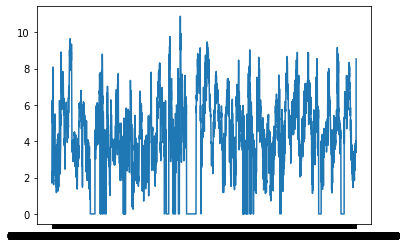

In [6]:
#1. Specific the index as a string constant:
#ts['03-01-2019']

#2. Import the datetime library and use 'datetime' function:
#from datetime import datetime
#ts[datetime(3,1,2019)]
#1. Specify the entire range:
ts['03-01-2019':'03-30-2019']

#2. Use ':' if one of the indices is at ends:
ts[:'03-31-2019']
plt.plot(ts)

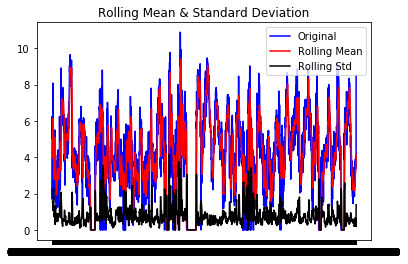

Results of Dickey-Fuller Test:
Test Statistic                -9.197991e+00
p-value                        2.037970e-15
#Lags Used                     5.000000e+00
Number of Observations Used    4.458000e+03
Critical Value (1%)           -3.431818e+00
Critical Value (5%)           -2.862189e+00
Critical Value (10%)          -2.567115e+00
dtype: float64


In [7]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd 
import matplotlib.pyplot as plt
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#moving_avg = ts_log.rolling(12).mean()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
       #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


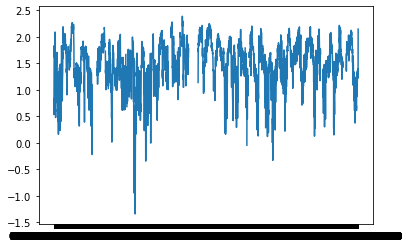

In [8]:
 ts_log = np.log(ts)
plt.plot(ts_log)


In [1]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

NameError: name 'ts_log' is not defined

In [82]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

,date,Met_Mast_Wind_Speed,Actual_Wind_Speed
0,03-01-2019 00:00,1.7518,2.2950
1,03-01-2019 00:10,1.8007,2.1500
2,03-01-2019 00:20,2.2892,1.7000
3,03-01-2019 00:30,3.4139,2.6890
4,03-01-2019 00:40,3.6930,3.0646


,date,Met_Mast_Wind_Speed,Actual_Wind_Speed
4459,03-31-2019 23:10,4.3798,3.8302
4460,03-31-2019 23:20,5.1840,3.7732
4461,03-31-2019 23:30,5.2475,3.8320
4462,03-31-2019 23:40,8.2236,3.3876
4463,03-31-2019 23:50,9.3917,8.5383


In [88]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('march.csv', nrows = 11856)

#Creating train and test set 

#Index 10392 marks the end of October 2013 
train=df[0:3500] 
test=df[3500:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df,format='%m-%d-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing